In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import base
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer

 - https://en.wikipedia.org/wiki/Michaelis%E2%80%93Menten_kinetics
 - https://en.wikipedia.org/wiki/Lineweaver%E2%80%93Burk_plot
 - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
 - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html
 - https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html#sklearn.pipeline.make_pipeline

In [2]:
def MichaelisMenten(S, vmax=1e-2, Km=5e-3):
    return vmax*S/(Km+S)

In [3]:
Slin = np.linspace(1e-4, 1e-1, 101)
vSlin = MichaelisMenten(Slin)

In [4]:
df = pd.DataFrame({'S': Slin, 'v': vSlin})
df.tail()

,S,v
96,0.096004,0.009505
97,0.097003,0.009510
98,0.098002,0.009515
99,0.099001,0.009519
100,0.100000,0.009524


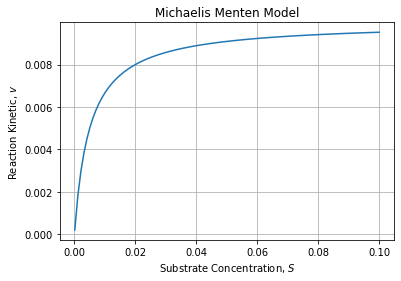

In [5]:
fig, axe = plt.subplots()
axe.plot(df['S'], df['v'])
axe.set_title("Michaelis Menten Model")
axe.set_xlabel('Substrate Concentration, $S$')
axe.set_ylabel('Reaction Kinetic, $v$')
axe.grid()

In [6]:
def inverse(x):
    return 1/x
InverseScaler = FunctionTransformer(func=inverse, inverse_func=inverse, check_inverse=True)

In [7]:
ISScaler = Pipeline(steps=[('Inverser', InverseScaler), ('Standardizer', StandardScaler())])

In [8]:
regressor = LinearRegression()

In [9]:
xScaler = base.clone(ISScaler).fit(df[['S']])
yScaler = base.clone(ISScaler).fit(df[['v']])

In [10]:
df['x'] = xScaler.transform(df[['S']])
df['y'] = yScaler.transform(df[['v']])

In [11]:
mmreg = base.clone(regressor).fit(df[['x']], df[['y']])

In [12]:
a1 , b1 = mmreg.coef_[0][0], mmreg.intercept_[0]

In [13]:
xm, sx = xScaler.named_steps["Standardizer"].mean_[0], xScaler.named_steps["Standardizer"].scale_[0]
ym, sy = yScaler.named_steps["Standardizer"].mean_[0], yScaler.named_steps["Standardizer"].scale_[0]

In [14]:
a0 = a1*(sy/sx)
a0

0.5000000000000001

In [15]:
b0 = b1 - a0*xm + ym
b0

99.99999999999996

In [16]:
vmax = 1/b0
vmax

0.010000000000000004

In [17]:
Km = vmax*a0
Km

0.005000000000000003